<h1>
<p>1. Изучите материал, представленный в разделе Ход работы.</p>
<p>2. Изучите подключенные данные.</p>
<p>3. Постройте модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов, описанные в Ходе работы.
a) Настройте наилучшие параметры моделей.
b) Сравните результаты.</p>
<p>4. Оформите Notebook.</p>
<p>Сделайте выводы по работе.</p></h1>

In [159]:
from sklearn.datasets import load_diabetes
import numpy as np
import mglearn
import mglearn.datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [160]:
diabetes = load_diabetes()

Text(0, 0.5, 'Целевая переменная')

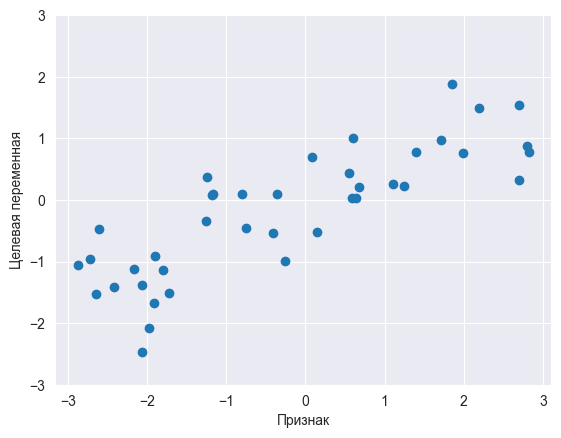

In [161]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [162]:
print("Ключи diabets(): \n{}".format(diabetes.keys()))

Ключи diabets(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [163]:
print("Форма массива data для набора diabets: {}".format(diabetes.data.shape))

Форма массива data для набора diabets: (442, 10)


In [164]:
hist, bin_edges = np.histogram(diabetes.target, bins=10)

# Создаем словарь с подсчетами для каждого бина
class_counts = {f"Bin {i+1}": count for i, count in enumerate(hist)}

print("Количество примеров для каждого класса:\n{}".format(class_counts))

Количество примеров для каждого класса:
{'Bin 1': 38, 'Bin 2': 80, 'Bin 3': 68, 'Bin 4': 62, 'Bin 5': 50, 'Bin 6': 41, 'Bin 7': 38, 'Bin 8': 42, 'Bin 9': 17, 'Bin 10': 6}


In [165]:
feature_names = diabetes.feature_names
print("Feature names:")
print (feature_names)

Feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


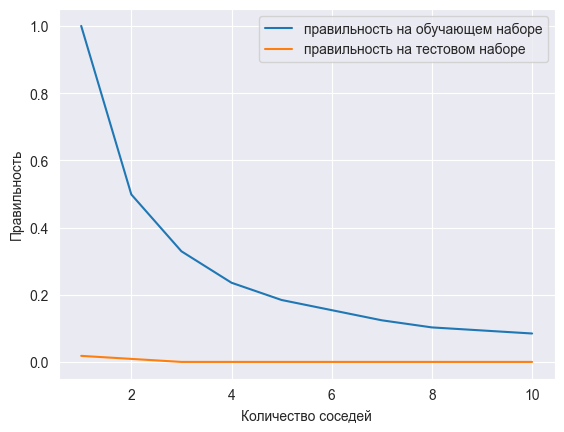

In [166]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,  random_state=66)
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("Количество соседей")
plt.legend()

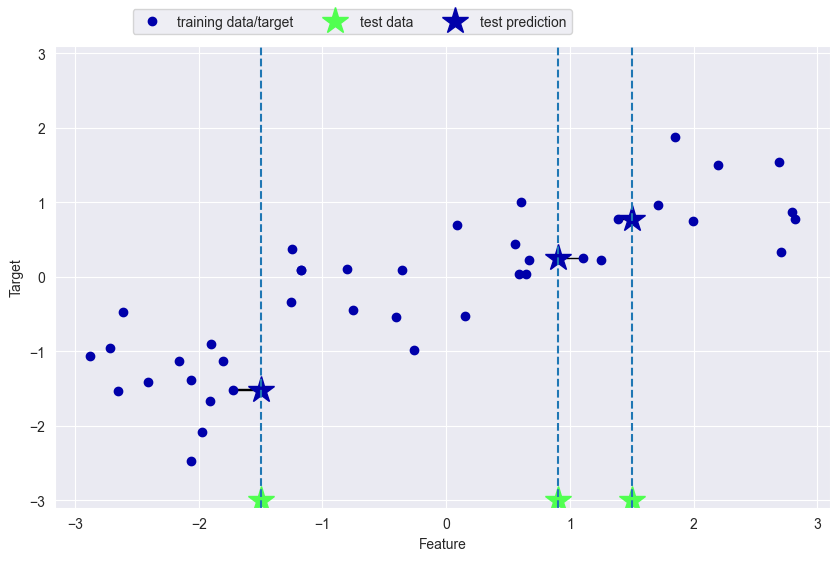

In [167]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

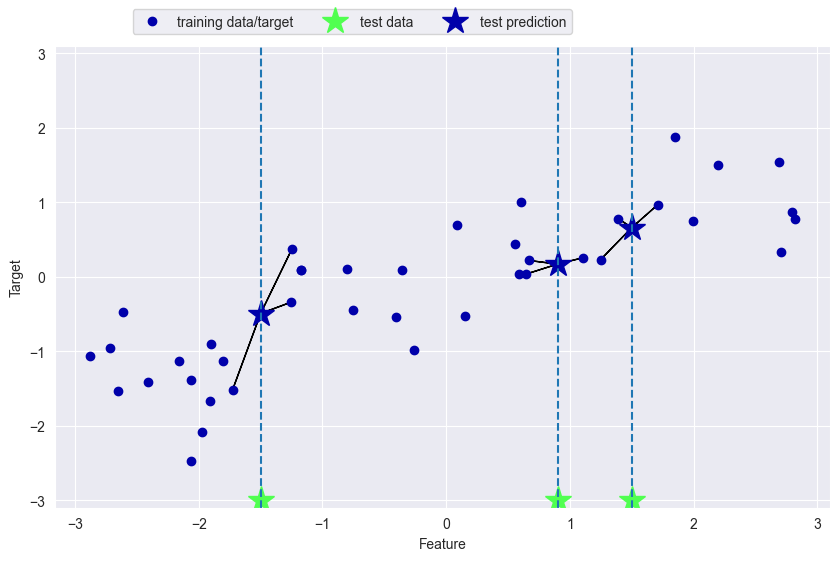

In [168]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [169]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [170]:
print ("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [171]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


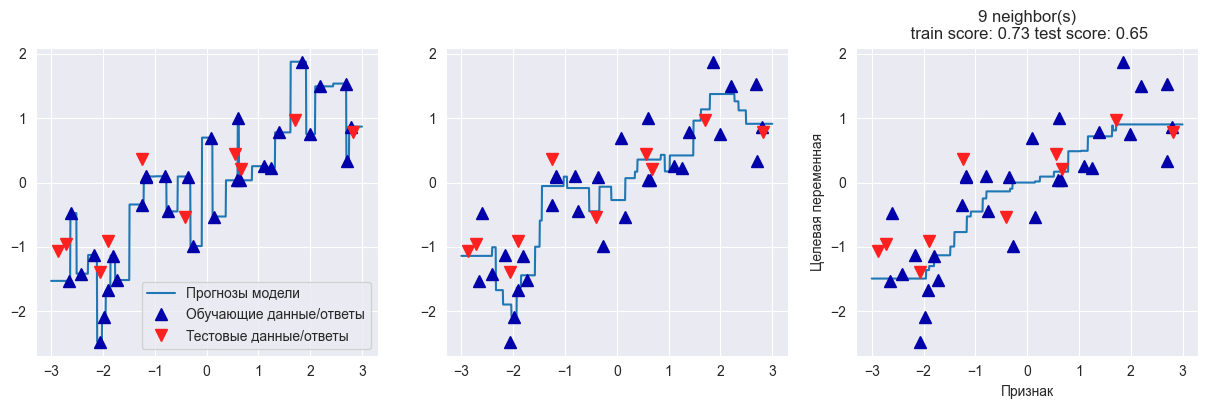

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
     reg = KNeighborsRegressor(n_neighbors=n_neighbors)
     reg.fit(X_train, y_train)
     ax.plot(line, reg.predict(line))
     ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
     ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),
reg.score(X_test, y_test)))
ax.set_xlabel("Признак")
ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы", "Тестовые данные/ответы"], loc="best")

w[0]: 0.393906  b: -0.031804


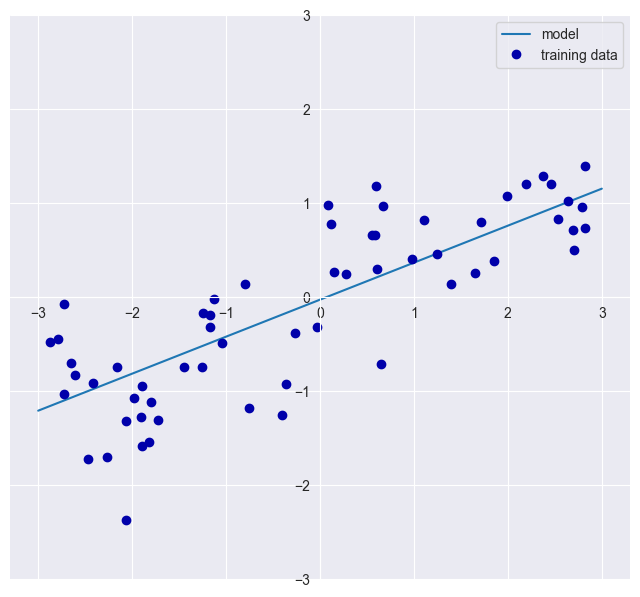

In [173]:
mglearn.plots.plot_linear_regression_wave()

<h1>Линейная регрессия</h1>

In [174]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)
lr = LinearRegression().fit(X_train, y_train)


In [175]:
print("lr coefficents:\n", lr.coef_)
print("lr intercept:\n", lr.intercept_)

lr coefficents:
 [ -43.26198867 -208.66589855  593.40654802  302.89100542 -560.19094014
  261.40753499   -8.86674758  135.93174293  703.18354112   28.34977176]
lr intercept:
 153.06786205925664


In [176]:
print("Правильность на обуч наборе: {}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом набоpe: {} ".format(lr.score(X_test, y_test)))

Правильность на обуч наборе: 0.5554337250189862
Правильность на тестовом набоpe: 0.35940880381777096 


<h1>Гребневая регрессия</h1>

In [177]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print ("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print ("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.46
Правильность на тестовом наборе: 0.36


In [178]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print ("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print ("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.17
Правильность на тестовом наборе: 0.14


In [179]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print ("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print ("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.37


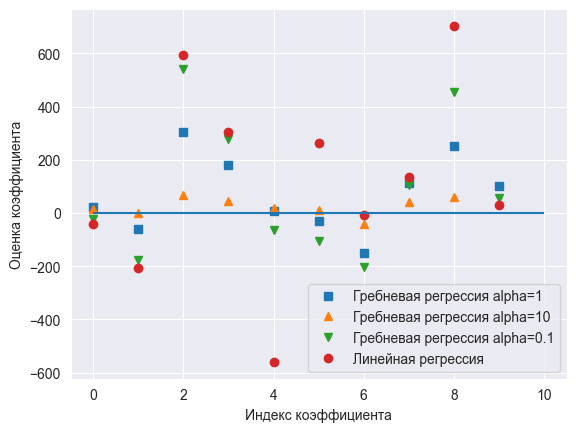

In [180]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")

plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()
plt.show()


In [181]:
# mglearn.plots.plot_ridge_n_samples()

<h1>Лассо</h1>

In [182]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
lasso = Lasso()
lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.3f}")
print(f"Правильность на тестовом наборе: {test_score:.3f}")

Правильность на обучающем наборе: 0.414
Правильность на тестовом наборе: 0.278


In [183]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001. score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.55
Правильность на тестовом наборе: 0.35
Количество использованных признаков: 9


In [184]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}" .format(lasso00001. score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}". format (lasso00001. score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.56
Правильность на тестовом наборе: 0.36
Количество использованных признаков: 10


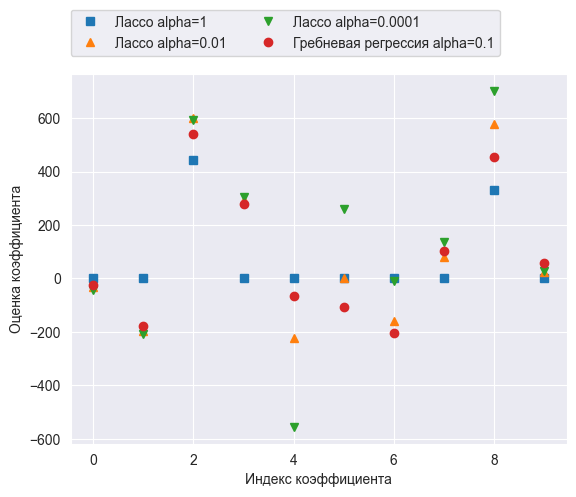

In [185]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()


<h1>Logistic Regression</h1>

/Users/ernazerkinbekov/Desktop/bigData/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ernazerkinbekov/Desktop/bigData/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


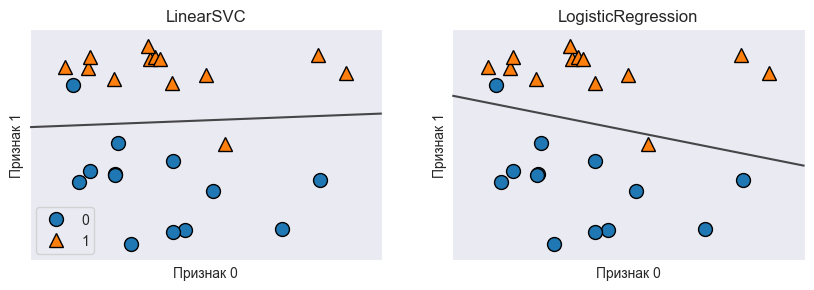

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()
plt.show()

In [187]:
# from sklearn.datasets import load_breast_cancer

diabetes = load_diabetes()
X_train = diabetes.data
y_train = diabetes.target
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}" .format(logreg.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

Правильность на обучающем наборе: 0.020
Правильность на тестовом наборе: 0.018
Accuracy of Logistic regression classifier on training set: 0.02


In [188]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}" .format(logreg100.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

Правильность на обучающем наборе: 0.145
Правильность на тестовом наборе: 0.135
Accuracy of Logistic regression classifier on training set: 0.02


In [189]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}" .format(logreg001.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))

Правильность на обучающем наборе: 0.020
Правильность на тестовом наборе: 0.018
Accuracy of Logistic regression classifier on training set: 0.02


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


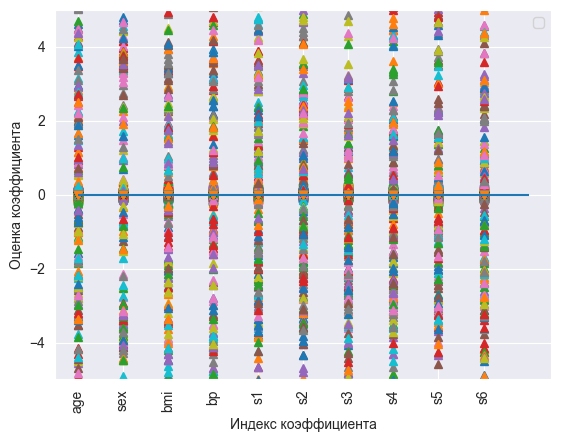

In [190]:
plt.plot(logreg.coef_.T, 'o')
plt.plot(logreg100.coef_.T, '^')
plt.plot(logreg001.coef_.T, 'v')
plt.xticks(range(diabetes.data.shape[1]), diabetes.feature_names, rotation=90)
plt.hlines(0, 0, diabetes.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()